In [6]:
# Global University Rankings Analysis
# A Data Visualization Portfolio Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from wordcloud import WordCloud

In [7]:
# Set the style for better-looking visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('top universities.csv')

C:\Users\luken\AppData\Local\Temp\ipykernel_13260\2771817453.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [9]:
# 1. Geographic Distribution Analysis
# Create a choropleth map using plotly
def create_university_map():
    country_counts = df['Country'].value_counts().reset_index()
    country_counts.columns = ['Country', 'Count']
    
    fig = px.choropleth(
        country_counts,
        locations='Country',
        locationmode='country names',
        color='Count',
        hover_name='Country',
        color_continuous_scale='Viridis',
        title='Global Distribution of Top Universities'
    )
    
    fig.update_layout(
        title_x=0.5,
        geo=dict(showframe=False),
        width=1000,
        height=600
    )
    
    return fig

In [10]:
# 2. Top Universities by Country
def plot_top_countries():
    plt.figure(figsize=(12, 6))
    top_countries = df['Country'].value_counts().head(15)
    
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title('Top 15 Countries by Number of Universities')
    plt.xlabel('Number of Universities')
    plt.ylabel('Country')
    
    # Add value labels
    for i, v in enumerate(top_countries.values):
        plt.text(v, i, f' {v:,}', va='center')
    
    plt.tight_layout()
    plt.show()

In [11]:
# 3. Ranking Distribution Analysis
def analyze_ranking_distribution():
    plt.figure(figsize=(12, 6))
    
    # Create rank bins
    df['Rank_Bracket'] = pd.qcut(df['Global Rank'], q=10, labels=['Top 10%', '10-20%', '20-30%', '30-40%', 
                                                                 '40-50%', '50-60%', '60-70%', '70-80%', 
                                                                 '80-90%', 'Bottom 10%'])
    
    # Plot distribution
    sns.histplot(data=df, x='Global Rank', bins=50)
    plt.title('Distribution of Global Rankings')
    plt.xlabel('Global Rank')
    plt.ylabel('Number of Universities')
    plt.tight_layout()
    plt.show()
    
    return df['Rank_Bracket'].value_counts()

In [12]:
# 4. Top Universities Hub Cities
def analyze_university_cities():
    plt.figure(figsize=(12, 6))
    top_cities = df['City'].value_counts().head(15)
    
    sns.barplot(x=top_cities.values, y=top_cities.index)
    plt.title('Top 15 Cities by Number of Universities')
    plt.xlabel('Number of Universities')
    plt.ylabel('City')
    
    # Add value labels
    for i, v in enumerate(top_cities.values):
        plt.text(v, i, f' {v:,}', va='center')
    
    plt.tight_layout()
    plt.show()

In [13]:
# 5. Regional Analysis of Top 100 Universities
def analyze_top_100():
    top_100 = df[df['Global Rank'] <= 100]
    
    plt.figure(figsize=(10, 10))
    plt.pie(top_100['Country'].value_counts().values, 
            labels=top_100['Country'].value_counts().index,
            autopct='%1.1f%%',
            startangle=90)
    plt.title('Country Distribution of Top 100 Universities')
    plt.axis('equal')
    plt.show()

In [14]:
# 6. Interactive Rankings Explorer
def create_rankings_explorer():
    # Create scatter plot of ranks vs universities for top 20 countries
    top_20_countries = df['Country'].value_counts().head(20).index
    df_top_countries = df[df['Country'].isin(top_20_countries)]
    
    fig = px.scatter(df_top_countries,
                    x='Global Rank',
                    y='Country',
                    color='Country',
                    title='University Rankings Distribution by Country',
                    hover_data=['University', 'City'])
    
    fig.update_layout(
        height=800,
        showlegend=False,
        title_x=0.5
    )
    
    return fig

In [15]:
# 7. University Excellence Clusters
def analyze_excellence_clusters():
    # Create ranking clusters
    df['Ranking_Cluster'] = pd.cut(df['Global Rank'], 
                                 bins=[0, 100, 500, 1000, 5000, float('inf')],
                                 labels=['Elite (1-100)', 'Premier (101-500)', 
                                       'Distinguished (501-1000)',
                                       'Notable (1001-5000)', 'Emerging (5000+)'])
    
    plt.figure(figsize=(12, 6))
    cluster_counts = df['Ranking_Cluster'].value_counts()
    
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
    plt.title('Distribution of Universities Across Excellence Clusters')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Universities')
    
    # Add value labels
    for i, v in enumerate(cluster_counts.values):
        plt.text(i, v, f' {v:,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [16]:
# 8. Advanced Analytics: Concentration Index
def calculate_concentration_index():
    # Calculate the concentration of top universities by country
    country_counts = df['Country'].value_counts()
    total_unis = len(df)
    
    concentration_index = pd.DataFrame({
        'Country': country_counts.index,
        'University_Count': country_counts.values,
        'Share_of_Total': (country_counts.values / total_unis * 100).round(2)
    })
    
    # Calculate cumulative share
    concentration_index['Cumulative_Share'] = concentration_index['Share_of_Total'].cumsum()
    
    # Plot Lorenz curve
    plt.figure(figsize=(10, 10))
    plt.plot([0, 100], [0, 100], 'r--', label='Perfect Equality')
    plt.plot([0] + list(range(1, len(concentration_index) + 1)), 
             [0] + list(concentration_index['Cumulative_Share']),
             label='Actual Distribution')
    plt.title('Lorenz Curve of Global University Distribution')
    plt.xlabel('Cumulative % of Countries')
    plt.ylabel('Cumulative % of Universities')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return concentration_index.head(10)

Starting Global University Rankings Analysis...


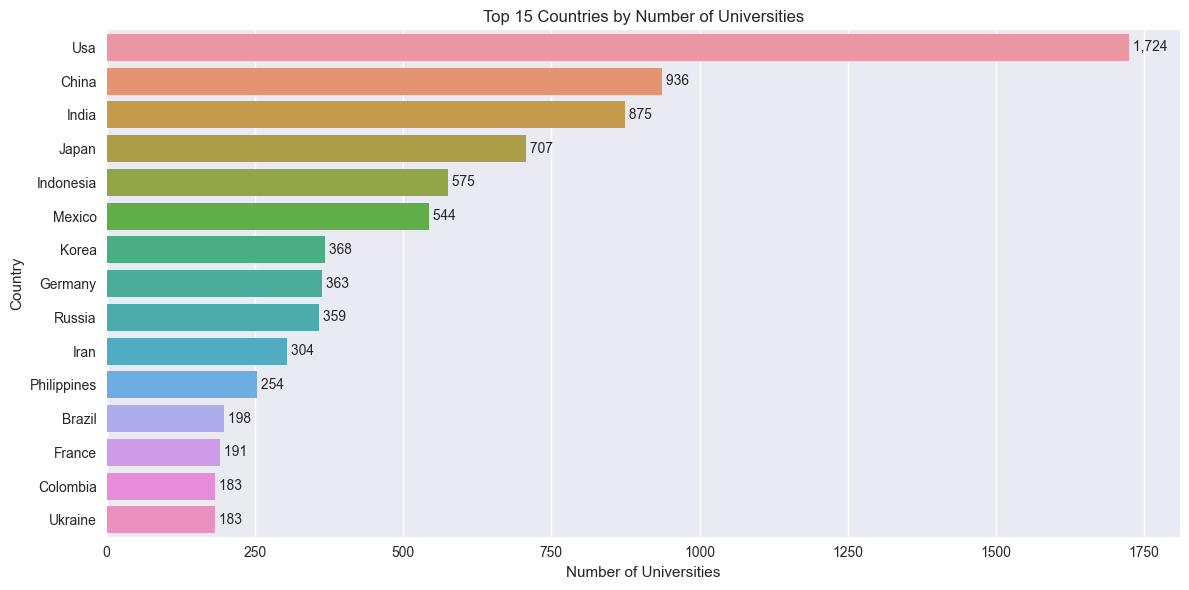

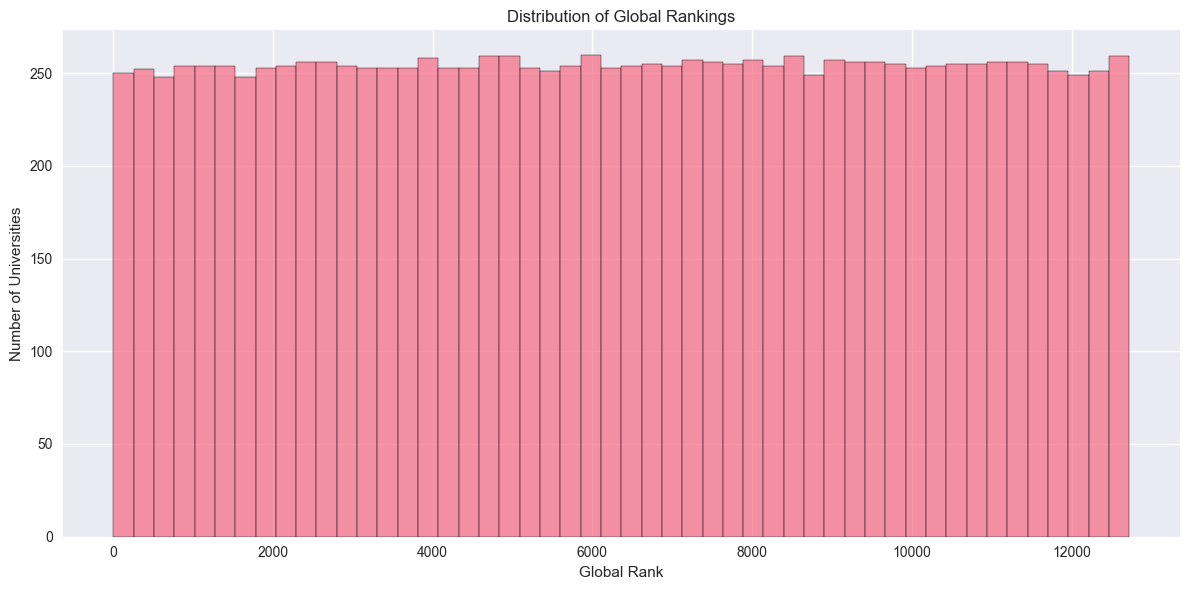


Ranking Distribution:
Top 10%       1272
40-50%        1272
Bottom 10%    1272
10-20%        1271
20-30%        1271
30-40%        1271
50-60%        1271
60-70%        1271
70-80%        1271
80-90%        1271
Name: Rank_Bracket, dtype: int64


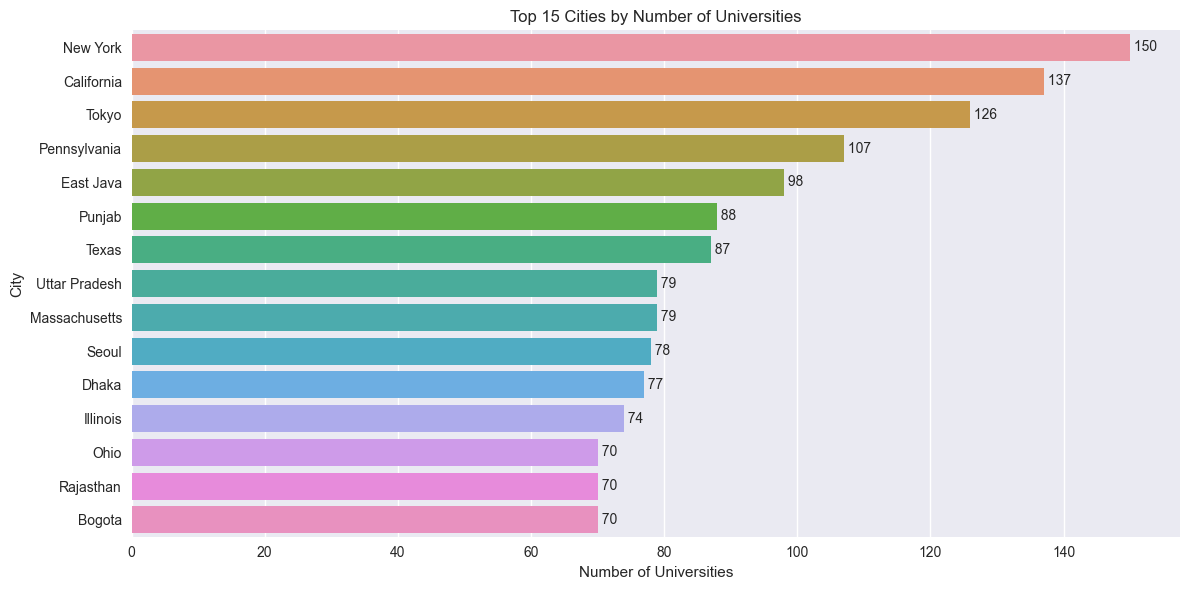

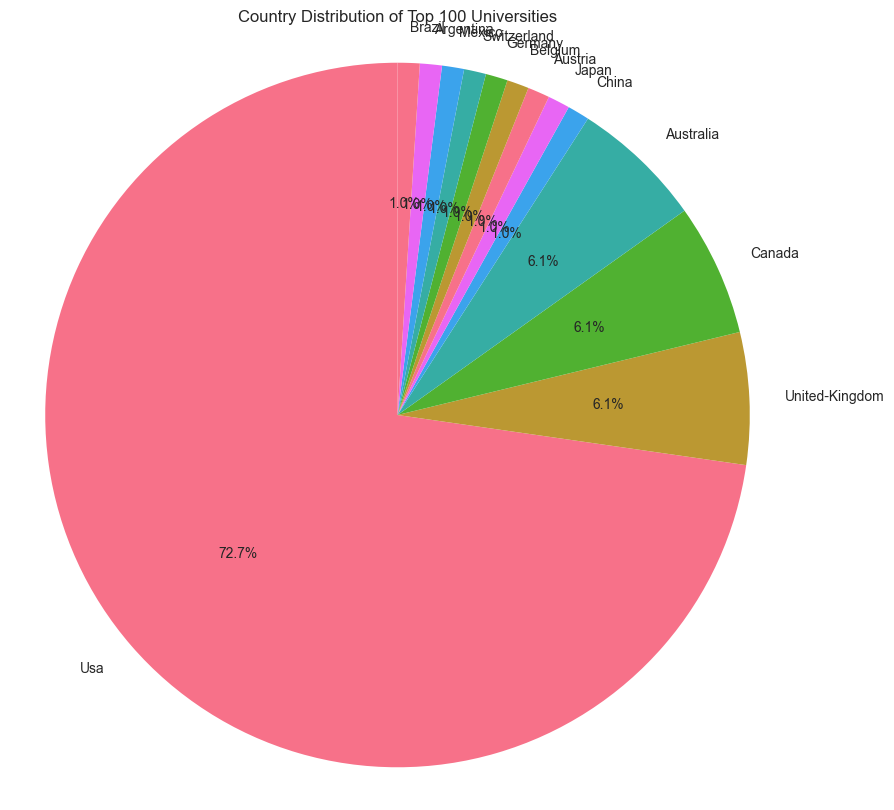

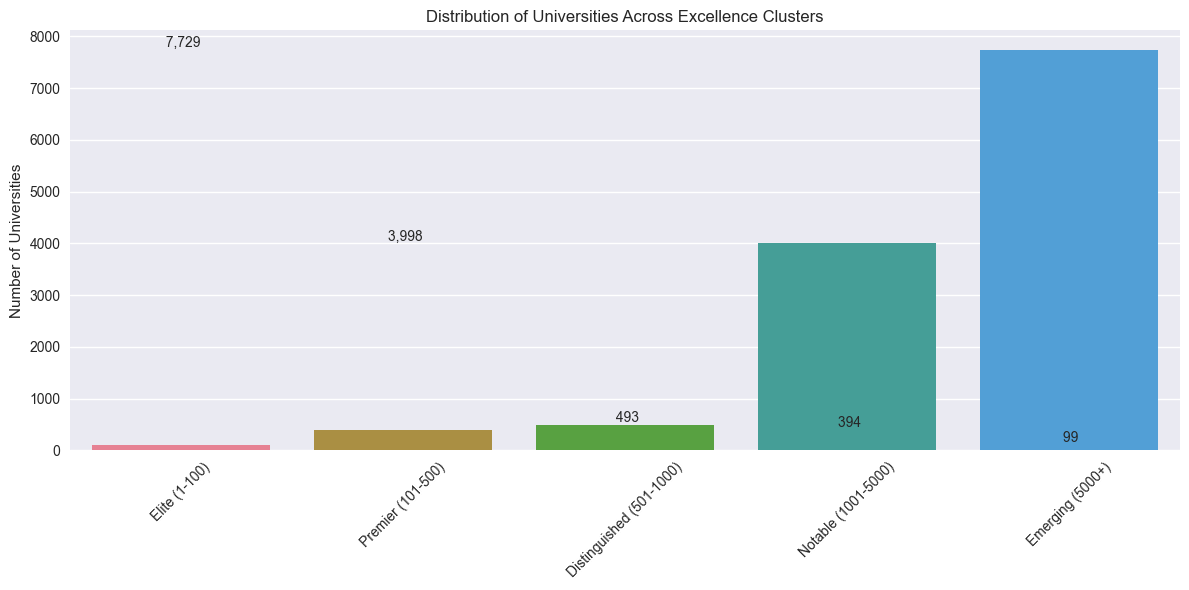

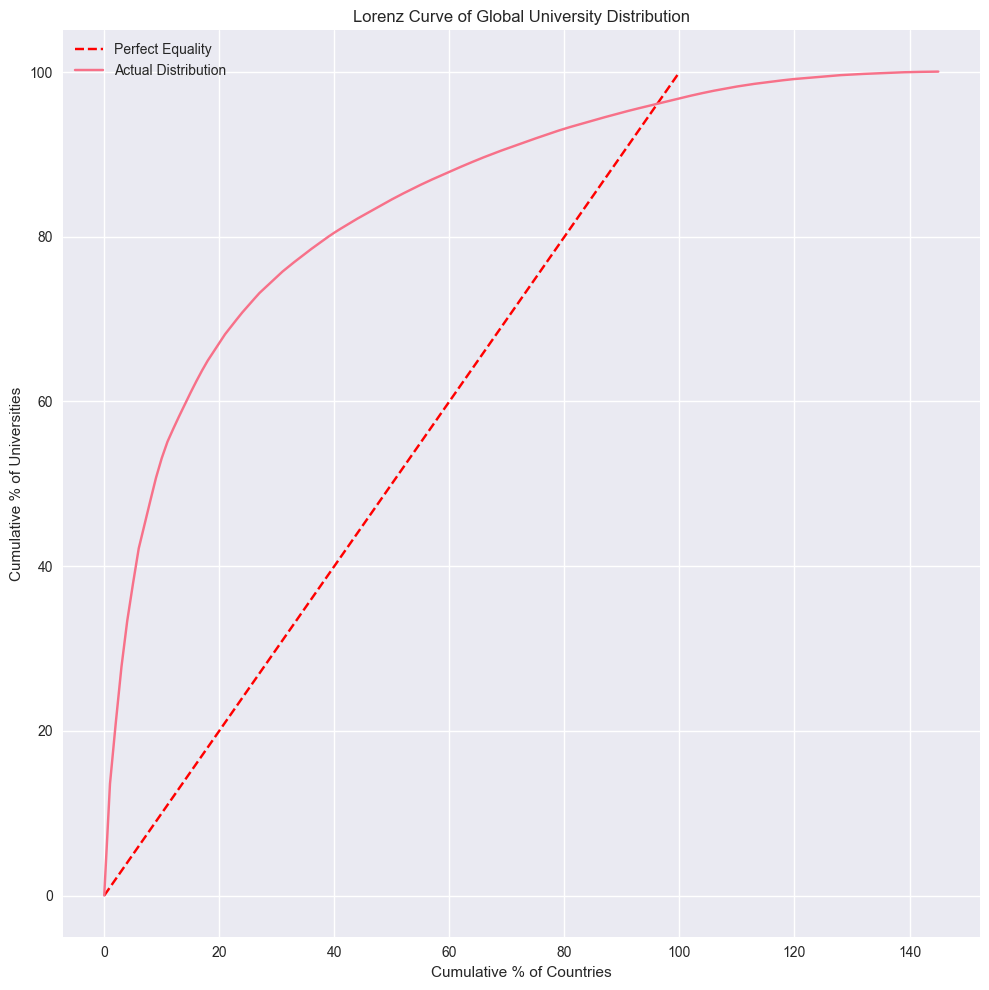


University Concentration by Country:
     Country  University_Count  Share_of_Total  Cumulative_Share
0        Usa              1724           13.56             13.56
1      China               936            7.36             20.92
2      India               875            6.88             27.80
3      Japan               707            5.56             33.36
4  Indonesia               575            4.52             37.88
5     Mexico               544            4.28             42.16
6      Korea               368            2.89             45.05
7    Germany               363            2.86             47.91
8     Russia               359            2.82             50.73
9       Iran               304            2.39             53.12


In [17]:
# Execute all visualizations
if __name__ == "__main__":
    print("Starting Global University Rankings Analysis...")
    
    # Create world map
    world_map = create_university_map()
    world_map.show()
    
    # Plot country distribution
    plot_top_countries()
    
    # Analyze ranking distribution
    rank_distribution = analyze_ranking_distribution()
    print("\nRanking Distribution:")
    print(rank_distribution)
    
    # Analyze cities
    analyze_university_cities()
    
    # Analyze top 100
    analyze_top_100()
    
    # Create interactive explorer
    rankings_explorer = create_rankings_explorer()
    rankings_explorer.show()
    
    # Analyze excellence clusters
    analyze_excellence_clusters()
    
    # Calculate and display concentration index
    concentration_stats = calculate_concentration_index()
    print("\nUniversity Concentration by Country:")
    print(concentration_stats)
